# Sheet 12 Exercise 34 - Resubmission
**Niklas Markert** - 1611460 / bt709885


## a)
A neuron is a logistic regression unit, which has multiple inputs and one output. A layer is an amount of neurons, which are on the same level of a neural network. The neurons of two adjacent layers are connected with each other. That means the outputs of the neurons of layer i are the inputs for the neurons of layer i+1.

## b)

In [10]:
#%pip install tensorflow

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
tf.__version__

'2.5.0'

In [15]:
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

(192,)

## c)

In [40]:
from tensorflow.keras import models
from tensorflow.keras import layers
from sklearn import metrics

In [18]:
n = x_train.shape[1]
n

8

In [19]:
network = models.Sequential()
network.add(layers.Dense(1, activation='sigmoid', input_shape=(n,)))

In [23]:
network.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [39]:
network.fit(x_train, y_train, epochs=10)

Epoch 1/10
18/18 [==============================] - 0s 1ms/step - loss: 0.4827 - accuracy: 0.7656
Epoch 2/10
18/18 [==============================] - 0s 2ms/step - loss: 0.4827 - accuracy: 0.7656
Epoch 3/10
18/18 [==============================] - 0s 2ms/step - loss: 0.4828 - accuracy: 0.7656
Epoch 4/10
18/18 [==============================] - 0s 2ms/step - loss: 0.4827 - accuracy: 0.7656
Epoch 5/10
18/18 [==============================] - 0s 2ms/step - loss: 0.4827 - accuracy: 0.7656
Epoch 6/10
18/18 [==============================] - 0s 3ms/step - loss: 0.4827 - accuracy: 0.7656
Epoch 7/10
18/18 [==============================] - 0s 4ms/step - loss: 0.4827 - accuracy: 0.7656
Epoch 8/10
18/18 [==============================] - 0s 2ms/step - loss: 0.4827 - accuracy: 0.7656
Epoch 9/10
18/18 [==============================] - 0s 2ms/step - loss: 0.4827 - accuracy: 0.7656
Epoch 10/10
18/18 [==============================] - 0s 2ms/step - loss: 0.4827 - accuracy: 0.7656


In [54]:
pred_test = network.predict(x_test)
pred_test[pred_test > 0.5] = 1
pred_test[pred_test <= 0.5] = 0

In [55]:
cnf_matrix = metrics.confusion_matrix(y_test, pred_test)
cnf_matrix

array([[118,  12],
       [ 26,  36]], dtype=int64)

## d)

In [56]:
network2 =  models.Sequential()
network2.add(layers.Dense(12, activation='relu', input_shape=(n,)))
network2.add(layers.Dense(10, activation='relu'))
network2.add(layers.Dense(1, activation='sigmoid'))

In [57]:
network2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [102]:
hist = network2.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test))

Epoch 1/15
18/18 [==============================] - 0s 5ms/step - loss: 0.3527 - accuracy: 0.8594 - val_loss: 0.5487 - val_accuracy: 0.7812
Epoch 2/15
18/18 [==============================] - 0s 4ms/step - loss: 0.3534 - accuracy: 0.8455 - val_loss: 0.5499 - val_accuracy: 0.7865
Epoch 3/15
18/18 [==============================] - 0s 3ms/step - loss: 0.3530 - accuracy: 0.8455 - val_loss: 0.5496 - val_accuracy: 0.7812
Epoch 4/15
18/18 [==============================] - 0s 4ms/step - loss: 0.3525 - accuracy: 0.8507 - val_loss: 0.5500 - val_accuracy: 0.7812
Epoch 5/15
18/18 [==============================] - 0s 3ms/step - loss: 0.3521 - accuracy: 0.8507 - val_loss: 0.5500 - val_accuracy: 0.7812
Epoch 6/15
18/18 [==============================] - 0s 3ms/step - loss: 0.3516 - accuracy: 0.8455 - val_loss: 0.5517 - val_accuracy: 0.7812
Epoch 7/15
18/18 [==============================] - 0s 3ms/step - loss: 0.3521 - accuracy: 0.8559 - val_loss: 0.5510 - val_accuracy: 0.7760
Epoch 8/15
18/18 [==

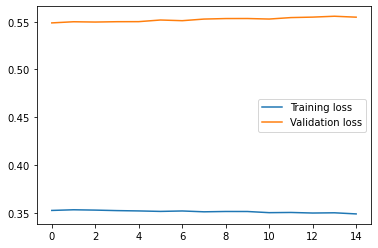

In [107]:
plt.plot(hist.history['loss'], label='Training loss')
plt.plot(hist.history['val_loss'], label='Validation loss')
plt.legend()

In [104]:
pred_test2 = network2.predict(x_test)
pred_test2[pred_test2 > 0.5] = 1
pred_test2[pred_test2 <= 0.5] = 0

In [105]:
cnf_matrix2 = metrics.confusion_matrix(y_test, pred_test2)
cnf_matrix2

array([[113,  17],
       [ 25,  37]], dtype=int64)

The plot indicates, that by increasing the number of epochs, the validation and training loss stay approximately constant. And as long as the validation loss isn't dramaticly increasing it, more epochs would lead to an overall better fit.